## [Proyecto] Fiebre puerperal y el lavado de manos: Análisis de dos clinicas en los años 1840 - 1849
<p><img style="float: right;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>

<p>La fiebre puerperal es una enfermedad causa principalmente por una infección polimicrobiana durante el embarazo o el parto. Esta fue la causante de hasta un 10% de muertes de mujeres que daban a luz en el Hospital General de Viena en los años 1840. El Dr. Ignaz Semmelweis, médico activo en dicho hospital, seria quien descubriría la causa de esta: el contacto infeccioso por parte de la poca higiene de los estudiantes de enfermería al tratar las mujeres en parto. 

Este análisis utiliza la información recolectada cada año desde 1840 hasta 1849 por el Dr. Semmelweis del número de nacimientos y muertes por fiebre puerperal en dos clínicas de Viena. Los datos serán divididos en dos grupos, antes de la implementación del lavado de manos obligatorio [1840-1846] y después de que este fue implementado [1847-1849].</p>

<p>Archivos utilizados:</p>
<ul>
<li><code>yearly_deaths_by_clinic.csv</code>: contiene la cuenta de nacimientos y muertes anuales en ambas clínicas [1840-1846]</li>
<li><code>monthly_deaths.csv</code>: contiene la cuenta de nacimientos y muertes mensuales en ambas clínicas [1840-1849].</li>
</ul>

## 1. Importación de los datos
<p>La tabla en 'yearly_deaths_by_clinic.csv' muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846, incluyendo el número de fallecidas.</p>


In [1]:
import pandas as pd
# Importa los datos de yearly_deaths_by_clinic.csv
anual = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Converte las columnas de la tabla a español
anual = anual.rename(columns={"births": "nacimientos", "deaths": "muertes", "year": "año", "clinic": "clínica"}, errors="raise")

# Calcula la proporción de muertes por número de nacimientos
anual['proporcion_muertes'] = anual['muertes'] / anual['nacimientos']

# Separa los datos para cada clínica (1 y 2)
clinica_1 = anual[anual['clínica'] == 'clinic 1']
clinica_2 = anual[anual['clínica'] == 'clinic 2']

# Muestra los datos de ambas clínicas
print(clinica_1)
print(clinica_2)

    año  nacimientos  muertes   clínica  proporcion_muertes
0  1841         3036      237  clinic 1            0.078063
1  1842         3287      518  clinic 1            0.157591
2  1843         3060      274  clinic 1            0.089542
3  1844         3157      260  clinic 1            0.082357
4  1845         3492      241  clinic 1            0.069015
5  1846         4010      459  clinic 1            0.114464
     año  nacimientos  muertes   clínica  proporcion_muertes
6   1841         2442       86  clinic 2            0.035217
7   1842         2659      202  clinic 2            0.075968
8   1843         2739      164  clinic 2            0.059876
9   1844         2956       68  clinic 2            0.023004
10  1845         3241       66  clinic 2            0.020364
11  1846         3754      105  clinic 2            0.027970


## 2. Comparación de muertes entre ambas clínicas
<p>Graficamos en busca de una tendencia entre ambas clínicas</p>

<AxesSubplot:xlabel='Año', ylabel='Proporción de muertes'>

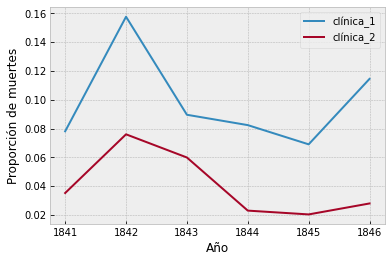

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# Gráfico: Proporción de muertes en ambas clínicas por año
plt.style.use('bmh')
ax = clinica_1.plot(x="año", y = "proporcion_muertes", label = "clínica_1")
clinica_2.plot(x="año", y = "proporcion_muertes",label="clínica_2", ax=ax, ylabel = "Proporción de muertes", xlabel = 'Año')

## 3. Implementación del lavado de manos y sus resultados
<p>La proporción de muertes en Clínica 1 es significativamente mayor que en Clínica 2. La principal diferencia entre las dos clínicas es que Clínica 1 tenía un gran número de estudiantes de medicina quienes, aparte de atender partos, también examinaban cadáveres en la morgue de la misma, mientras que en Clínica 2 los médicos y enfermeras que atendían los partos no realizaban tal labor.</p>

        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2
5 1841-06-01     200      10
6 1841-07-01     190      16
7 1841-08-01     222       3
8 1841-09-01     213       4
9 1841-10-01     236      26


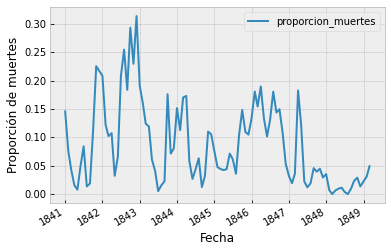

In [7]:
# Importa los datos de datasets/monthly_deaths.csv
mensual = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])
print(mensual.head(10))
# Convierte las columnas de la tabla a español
mensual = mensual.rename(columns={"births": "nacimientos", "deaths": "muertes", "date": "fecha"}, errors="raise")

# Calcula la proporción de muertes mensual por número de nacimientos
mensual["proporcion_muertes"] = mensual["muertes"] / mensual["nacimientos"]

# Gráfico: Proporción mensual de muertes por fecha
ax = mensual.plot(x="fecha", y = "proporcion_muertes", ylabel = "Proporción de muertes", xlabel = 'Fecha')


## 4. Visualización de antes y después de la implementación
<p> La implementación del lavado de manos obligatorio se realizó en el verano de 1847, ésta parte realiza la separación del antes y después de la proporción de muerte a partir de esa fecha. Mostrando con mayor claridad la dramática reducción en la proporción de muertes.</p>


<AxesSubplot:xlabel='Fecha', ylabel='Proporción de muertes'>

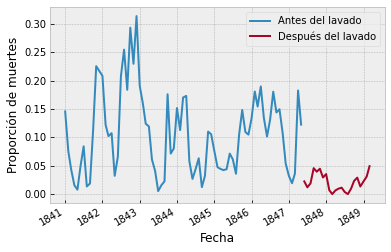

In [9]:
# Fecha de implementación
inicio_lavado = pd.to_datetime('1847-06-01')

# Separa los datos según antes y después
antes_lavado = mensual[mensual['fecha'] < inicio_lavado]
despues_lavado = mensual[mensual['fecha'] >= inicio_lavado]

# Gráfico: Proporción mensual de muertes antes y después de la implementación de lavado de manos
ax = antes_lavado.plot(x='fecha',y='proporcion_muertes', label='Antes del lavado')
despues_lavado.plot(x='fecha',y='proporcion_muertes',label = 'Después del lavado', ax=ax, ylabel = "Proporción de muertes", xlabel = 'Fecha')


## 5. Diferencia en la proporción media mensual de muertes debidas al lavado de manos
Tras el cálculo, encontramos desde la implementación del nuevo protocolo, se redujo la proporción de muertes en aproximadamente 8 puntos porcentuales. Del ~10.5% de media a solo el ~2.1%.

In [5]:
# Calcula la diferencia en la proporción media mensual de muertes
proporcion_antes = antes_lavado["proporcion_muertes"]
proporcion_despues = despues_lavado["proporcion_muertes"]
diferencia_promedio = proporcion_despues.mean() - proporcion_antes.mean()
print('La proporción de muertes promedio antes de la implementación es:', f"{proporcion_antes.mean():.1%}")
print('La proporción de muertes promedio después de la implementación es:',f"{proporcion_despues.mean():.1%}")
print('La diferencia en la proporción promedio es:', f"{diferencia_promedio:.1%}")


La proporción de muertes promedio antes de la implementación es: 10.5%
La proporción de muertes promedio después de la implementación es: 2.1%
La diferencia en la proporción promedio es: -8.4%


## 6. Análisis Bootstrap y conclusión
<p>Calculamos el intervalo de confianza dentro del cual se encuentra la diferencia de la proporción promedio real con un 95% nivel de confianza</p>
<p>Tras el cálculo podemos concluir que el lavado de manos redujo la proporción de muertes promedio entre 6,7 y 10 puntos porcentuales, con un intervalo de confianza del 95%.</p>

In [6]:
# Un análisis bootstrap de la reducción de las muertes debidas al lavado de manos
boot_diferencia_promedio = []
for i in range(3000):
    boot_antes = proporcion_antes.sample(frac=1, replace=True)
    boot_despues = proporcion_despues.sample(frac=1, replace=True)
    boot_diferencia_promedio.append(boot_despues.mean() - boot_antes.mean())

# Cálculo de un intervalo de confianza del 95% a partir de boot_diferencia_promedio 
confidence_interval = pd.Series(boot_diferencia_promedio).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.102002
0.975   -0.068098
dtype: float64
